In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch.nn as nn
import torch

In [3]:
from utils import MnistData
from models import ModelManager, ModelType

In [56]:
model_loaded = ModelManager.get_trained(ModelType.MnistCnnMilano)


In [ ]:
data = MnistData()

In [62]:
batch_size = 10
step_size = 1e-3
_, labels = data.get_training_batch(10)
images = torch.rand((10, 1, 28, 28))
loss_fn = nn.CrossEntropyLoss()
for i in range(10000):
    images.requires_grad = True
    if images.grad is not None:
        images.grad.zero_()
    loss = loss_fn(model_loaded(images), labels)
    loss.backward()
    new_images = images - step_size * images.grad.apply_(lambda x: 1 if x >= 0 else -1)
    images = MnistData.clip_for_image(new_images)

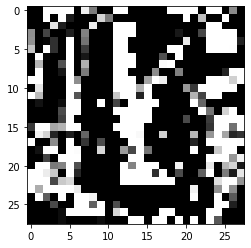

tensor(1)


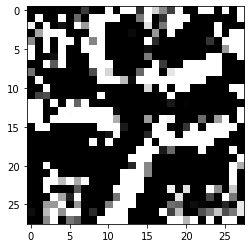

tensor(7)


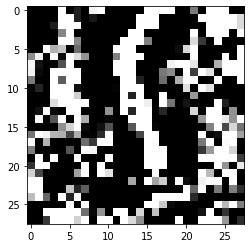

tensor(1)


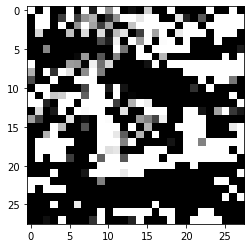

tensor(6)


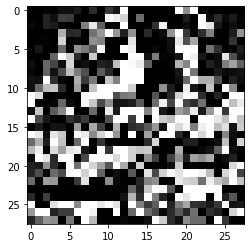

tensor(2)


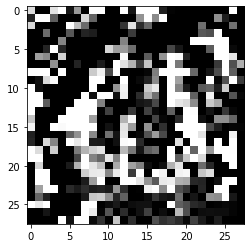

tensor(0)


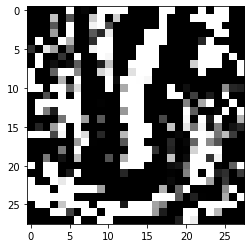

tensor(1)


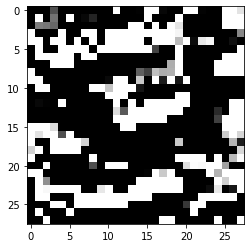

tensor(3)


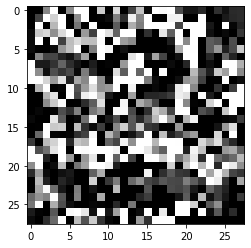

tensor(2)


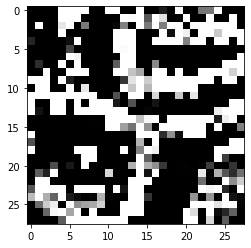

tensor(5)


In [63]:
for i in range(batch_size):
    MnistData.display(images[i])
    print(labels[i])